# Stock Price Predication

## Import basic libraries and read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pip install yfinance
import yfinance as yf

from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [2]:
# scrape stock data
stock_name="amzn"
stock=yf.Ticker(stock_name)
stock=stock.history(start="2022-01-01",end="2024-01-01")
stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,167.550003,170.703506,166.160507,170.404495,63520000,0.0,0.0
2022-01-04 00:00:00-05:00,170.438004,171.399994,166.349503,167.522003,70726000,0.0,0.0
2022-01-05 00:00:00-05:00,166.882996,167.126495,164.356995,164.356995,64302000,0.0,0.0
2022-01-06 00:00:00-05:00,163.450500,164.800003,161.936996,163.253998,51958000,0.0,0.0
2022-01-07 00:00:00-05:00,163.839005,165.243500,162.031006,162.554001,46606000,0.0,0.0


#### Explore data

In [3]:
stock.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-22 00:00:00-05:00,153.770004,154.350006,152.710007,153.419998,29480100,0.0,0.0
2023-12-26 00:00:00-05:00,153.559998,153.979996,153.029999,153.410004,25067200,0.0,0.0
2023-12-27 00:00:00-05:00,153.559998,154.779999,153.119995,153.339996,31434700,0.0,0.0
2023-12-28 00:00:00-05:00,153.720001,154.080002,152.949997,153.380005,27057000,0.0,0.0
2023-12-29 00:00:00-05:00,153.100006,153.889999,151.029999,151.940002,39789000,0.0,0.0


In [4]:
stock.shape

(501, 7)

In [5]:
stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          501 non-null    float64
 1   High          501 non-null    float64
 2   Low           501 non-null    float64
 3   Close         501 non-null    float64
 4   Volume        501 non-null    int64  
 5   Dividends     501 non-null    float64
 6   Stock Splits  501 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.3 KB


In [7]:
stock.isnull().sum() # NO null data

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [8]:
stock.duplicated().sum() # NO duplicated data 

0

##### Visualize stock price

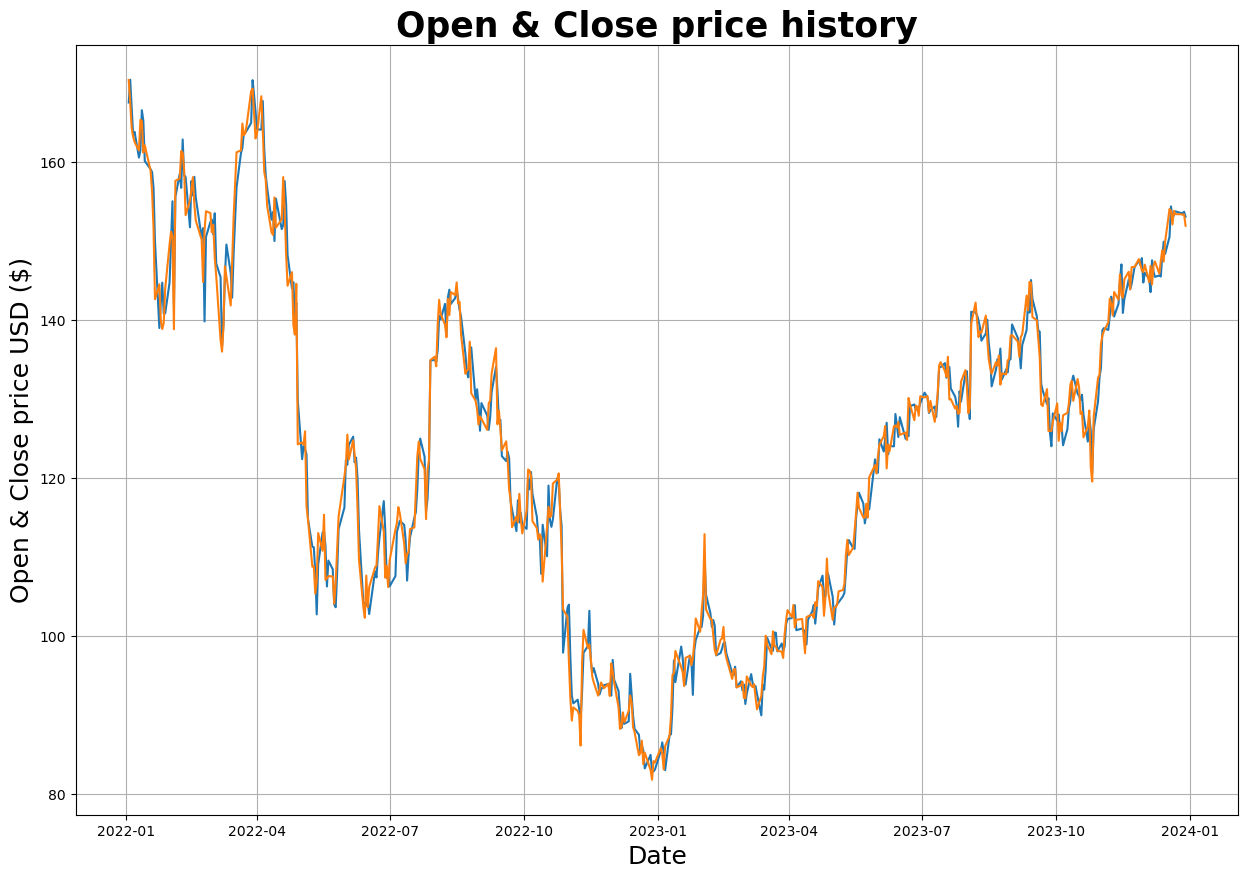

In [9]:
# visualize the opening and closing price
plt.figure(figsize=(15,10))
plt.plot(stock['Open'])
plt.plot(stock['Close'])
plt.title('Open & Close price history',fontsize=25,weight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Open & Close price USD ($)',fontsize=18)
plt.grid()
plt.show()

## Data preprocessing

In [10]:
stock.reset_index(inplace=True)
stock.drop(columns=['Date','Dividends','Stock Splits'],inplace=True)
stock.head()

,Open,High,Low,Close,Volume
0,167.550003,170.703506,166.160507,170.404495,63520000
1,170.438004,171.399994,166.349503,167.522003,70726000
2,166.882996,167.126495,164.356995,164.356995,64302000
3,163.450500,164.800003,161.936996,163.253998,51958000
4,163.839005,165.243500,162.031006,162.554001,46606000


#### Split Data

In [11]:
y=stock['Close']
x=stock.drop(columns=['Close'])
x.head()

,Open,High,Low,Volume
0,167.550003,170.703506,166.160507,63520000
1,170.438004,171.399994,166.349503,70726000
2,166.882996,167.126495,164.356995,64302000
3,163.450500,164.800003,161.936996,51958000
4,163.839005,165.243500,162.031006,46606000


In [12]:
# Split data to train, test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(350, 4)
(151, 4)
(350,)
(151,)


#### Scale Data

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

## MODEL

In [14]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

#### Evaluation

In [15]:
from sklearn.metrics import r2_score
print (r2_score(y_train,train_pred))
print (r2_score(y_test,test_pred))

0.9978906131470328
0.9971560173305509


In [16]:
import joblib

# Save the model
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [17]:
loaded_model = joblib.load('linear_regression_model.pkl')
last_row_values = stock.iloc[-1, [0, 1, 2, 4]].values.reshape(1, -1)  # Reshape for prediction

# Make a prediction
pred = loaded_model.predict(last_row_values)

print (pred[0])

23839936.914720472
